1

1: Diabetes, 0: No Diabetes


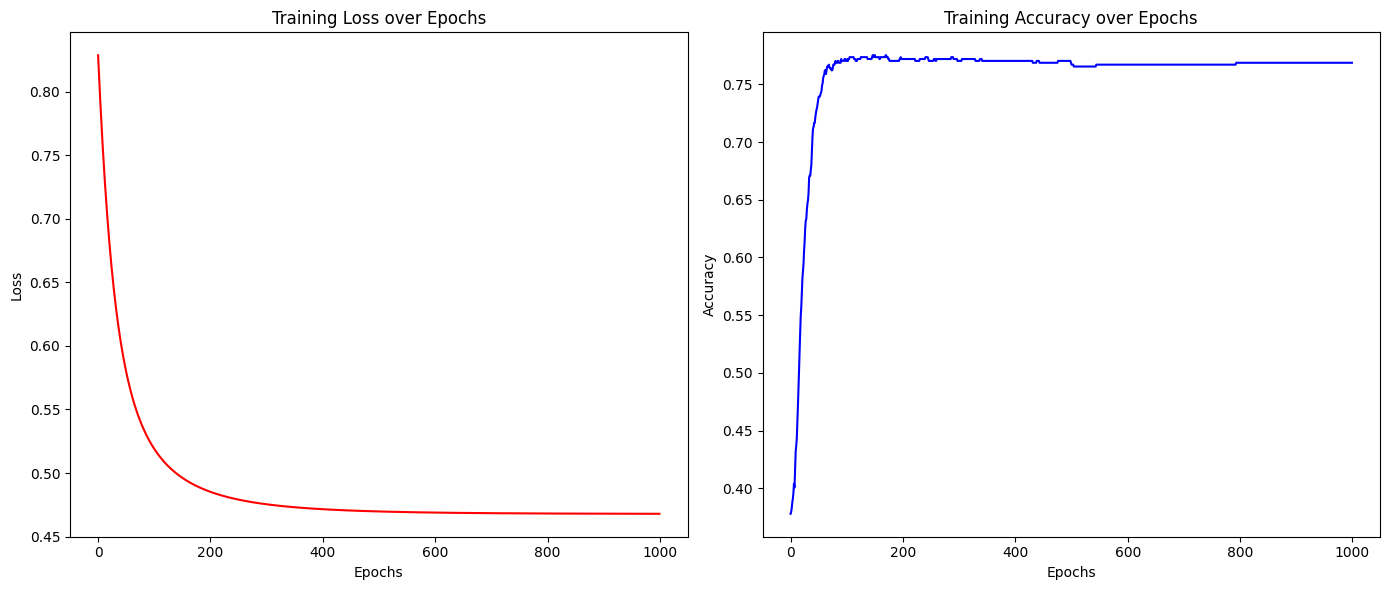

              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



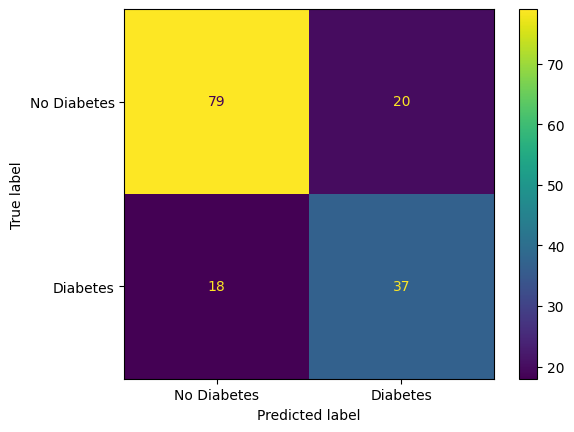

In [54]:
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load dataset and split features/target
diabetes_data = pd.read_csv('diabetes.csv')
X, y = diabetes_data.drop('Outcome', axis=1), diabetes_data['Outcome'].values
print("1: Diabetes, 0: No Diabetes")

# Train-eval split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_eval_tensor = torch.tensor(X_eval_scaled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_eval_tensor = torch.tensor(y_eval, dtype=torch.float32).unsqueeze(1)

# PyTorch Logistic Regression
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)  # One output for binary classification
    
    def forward(self, x):
        return torch.sigmoid(self.linear(x))

# Initialize model, loss function, and optimizer
input_dim = X_train_tensor.shape[1]
model = LogisticRegressionModel(input_dim)
criterion = nn.BCELoss() # Binary Cross-Entropy Loss used to calculate loss in each epoch
optimizer = optim.SGD(model.parameters(), lr=0.04)

# Training loop
n_epochs = 1000
train_losses, train_acc = [], []

for epoch in range(n_epochs):
    # Forward pass: compute predictions and loss
    y_train_pred = model(X_train_tensor)
    loss = criterion(y_train_pred, y_train_tensor)
    
    # Backward pass and optimization
    optimizer.zero_grad()  # Clear gradients
    loss.backward()  # Backpropagation
    optimizer.step()  # Update weights
    
    # Store training loss
    train_losses.append(loss.item())
    
    # Compute training accuracy
    with torch.no_grad():
        train_predictions = (y_train_pred >= 0.5).float()
        accuracy = (train_predictions.eq(y_train_tensor).sum() / y_train_tensor.shape[0]).item()
        train_acc.append(accuracy)

# Evaluate on evaluation data
model.eval()
with torch.no_grad():
    y_eval_pred = model(X_eval_tensor)
    eval_predictions = (y_eval_pred >= 0.5).float()

# Plotting training loss and accuracy over iterations
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].plot(train_losses, color='red')
axes[0].set_title('Training Loss over Epochs')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')

axes[1].plot(train_acc, color='blue')
axes[1].set_title('Training Accuracy over Epochs')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

# Print classification report
print(classification_report(y_eval, eval_predictions.numpy()))

# Confusion Matrix
cm = confusion_matrix(y_eval, eval_predictions.numpy())
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels={"No Diabetes", "Diabetes"})
disp.plot()


2

1: Benign, 0: Malignant
Without weight penalty:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 800x600 with 0 Axes>

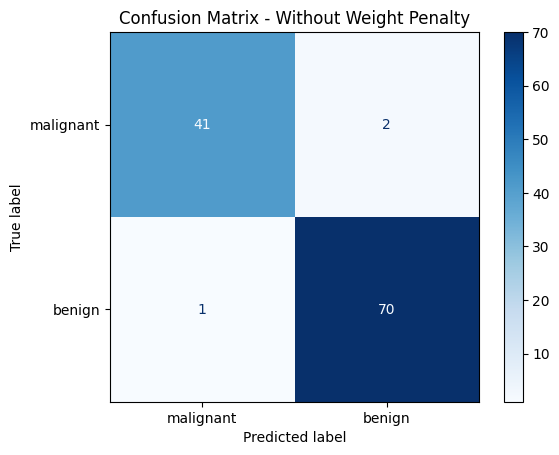

Accuracy: 0.97, Precision: 0.97, Recall: 0.99, F1 Score: 0.98


With weight penalty:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        43
           1       0.97      1.00      0.99        71

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



<Figure size 800x600 with 0 Axes>

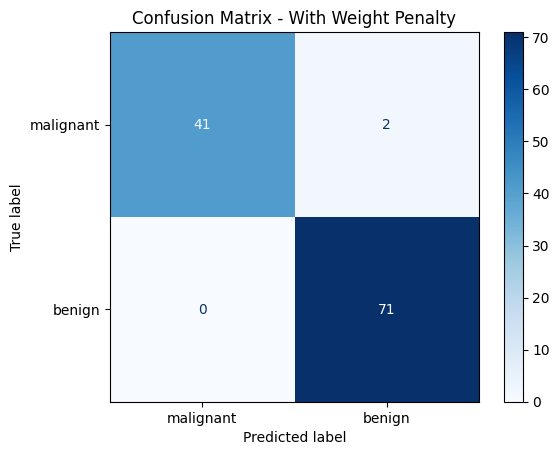

Accuracy: 0.98, Precision: 0.97, Recall: 1.0, F1 Score: 0.98


In [70]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target
print("1: Benign, 0: Malignant")

# Train-eval split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# 1 - Without weight penalty
model_no_penalty = LogisticRegression(max_iter=1000, random_state=82)
model_no_penalty.fit(X_train_scaled, y_train)

# Predictions
y_eval_pred_no_penalty = model_no_penalty.predict(X_eval_scaled)

print("Without weight penalty:")
print(classification_report(y_eval, y_eval_pred_no_penalty))

# Confusion Matrix
cm_no_penalty = confusion_matrix(y_eval, y_eval_pred_no_penalty)
disp_no_penalty = ConfusionMatrixDisplay(confusion_matrix=cm_no_penalty, display_labels=cancer_data.target_names)

plt.figure(figsize=(8, 6))
disp_no_penalty.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Without Weight Penalty")
plt.show()

# Extracting performance metrics
accuracy = np.round(np.mean(y_eval_pred_no_penalty == y_eval), 2)
precision = np.round(cm_no_penalty[1, 1] / (cm_no_penalty[1, 1] + cm_no_penalty[0, 1]), 2)
recall = np.round(cm_no_penalty[1, 1] / (cm_no_penalty[1, 1] + cm_no_penalty[1, 0]), 2)
f1_score = np.round(2 * (precision * recall) / (precision + recall), 2)

# Print metrics
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}')
print("\n")



# 2 - With weight penalty (L2 regularization)
model_with_penalty = LogisticRegression(max_iter=1000, penalty='l2', C=0.3, random_state=82)
model_with_penalty.fit(X_train_scaled, y_train)

# Predictions
y_eval_pred_with_penalty = model_with_penalty.predict(X_eval_scaled)

print("With weight penalty:")
print(classification_report(y_eval, y_eval_pred_with_penalty))

# Confusion Matrix
cm_with_penalty = confusion_matrix(y_eval, y_eval_pred_with_penalty)
disp_with_penalty = ConfusionMatrixDisplay(confusion_matrix=cm_with_penalty, display_labels=cancer_data.target_names)

plt.figure(figsize=(8, 6))
disp_with_penalty.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - With Weight Penalty")
plt.show()

# Extracting performance metrics
accuracy = np.round(np.mean(y_eval_pred_with_penalty == y_eval), 2)
precision = np.round(cm_with_penalty[1, 1] / (cm_with_penalty[1, 1] + cm_with_penalty[0, 1]), 2)
recall = np.round(cm_with_penalty[1, 1] / (cm_with_penalty[1, 1] + cm_with_penalty[1, 0]), 2)
f1_score = np.round(2 * (precision * recall) / (precision + recall), 2)

# Print metrics
print(f'Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}')


3

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



<Figure size 800x600 with 0 Axes>

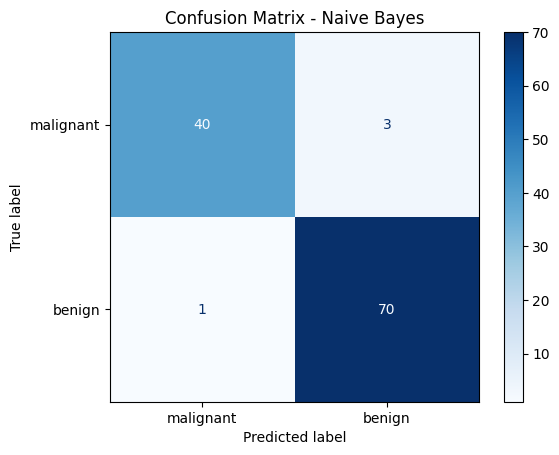

Naive Bayes
Accuracy: 0.96, Precision: 0.96, Recall: 0.99, F1 Score: 0.97


In [61]:
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Train-eval split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional for Naive Bayes, but done for consistency)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_eval_scaled = scaler.transform(X_eval)

# Create and train the Naive Bayes model
naive_bayes_model = GaussianNB()
naive_bayes_model.fit(X_train_scaled, y_train)

# Predictions
y_eval_pred_nb = naive_bayes_model.predict(X_eval_scaled)

# Evaluate the model
print("Naive Bayes Classification Report:")
print(classification_report(y_eval, y_eval_pred_nb))

# Confusion Matrix
cm_nb = confusion_matrix(y_eval, y_eval_pred_nb)
disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=cancer_data.target_names)

plt.figure(figsize=(8, 6))
disp_nb.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Naive Bayes")
plt.show()

# Extracting performance metrics
accuracy = np.round(np.mean(y_eval_pred_nb == y_eval), 2)
precision = np.round(cm_nb[1, 1] / (cm_nb[1, 1] + cm_nb[0, 1]), 2)
recall = np.round(cm_nb[1, 1] / (cm_nb[1, 1] + cm_nb[1, 0]), 2)
f1_score = np.round(2 * (precision * recall) / (precision + recall), 2)

# Print metrics
print(f'Naive Bayes\nAccuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1 Score: {f1_score}')


4

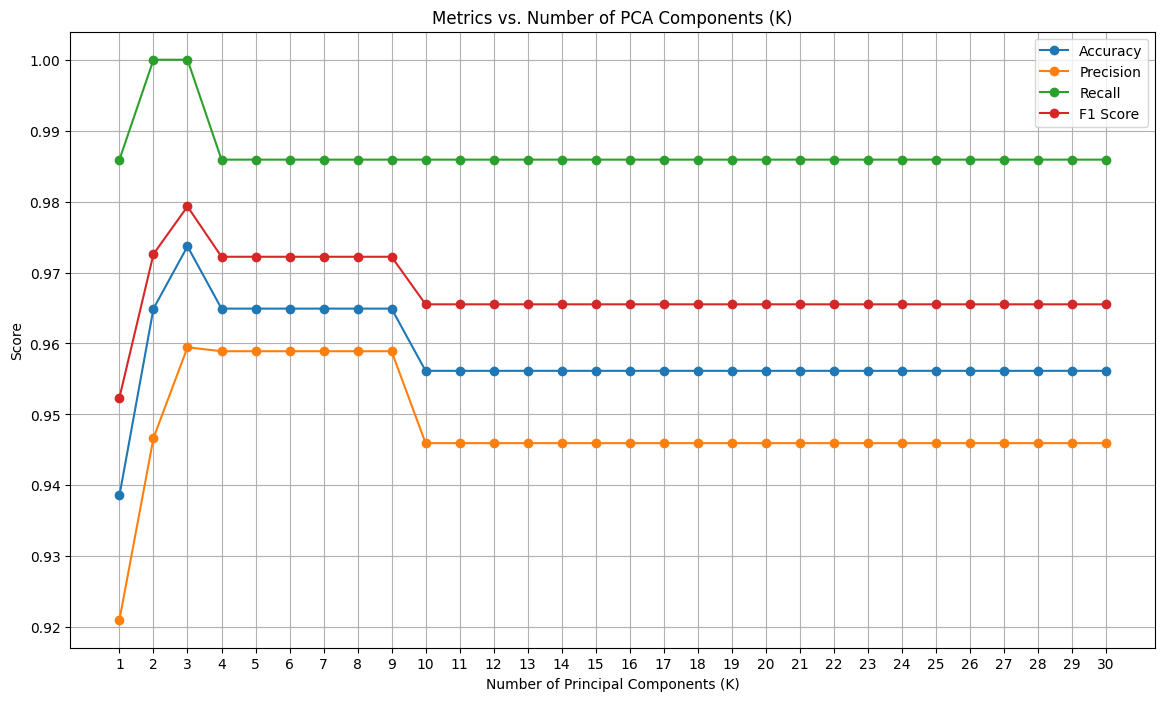

Optimal number of K components: 3
Best Metrics with K=3:
Accuracy: 0.9737, Precision: 0.9595, Recall: 1.0000, F1 Score: 0.9793


In [59]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Train-eval split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

# Number of components to test
K_values = range(1, 31)  # Testing PCA components from 1 to 30

for K in K_values:
    # PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_eval_pca = pca.transform(X_eval)

    # Logistic Regression
    model = LogisticRegression(max_iter=1000, random_state=42)
    model.fit(X_train_pca, y_train)

    # Predictions
    y_eval_pred = model.predict(X_eval_pca)

    cm = confusion_matrix(y_eval, y_eval_pred)
    accuracy = np.mean(y_eval_pred == y_eval)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(K_values, accuracy_list, label='Accuracy', marker='o')
plt.plot(K_values, precision_list, label='Precision', marker='o')
plt.plot(K_values, recall_list, label='Recall', marker='o')
plt.plot(K_values, f1_score_list, label='F1 Score', marker='o')
plt.title('Metrics vs. Number of PCA Components (K)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.xticks(K_values)
plt.legend()
plt.grid()
plt.show()

# Identify the optimum K
optimal_k = np.argmax(accuracy_list) + 1  # Adding 1 for 0-indexing
print(f'Optimal number of K components: {optimal_k}')

# Report the best metrics
best_accuracy = accuracy_list[optimal_k - 1]
best_precision = precision_list[optimal_k - 1]
best_recall = recall_list[optimal_k - 1]
best_f1_score = f1_score_list[optimal_k - 1]

print(f'Best Metrics with K={optimal_k}:')
print(f'Accuracy: {best_accuracy:.4f}, Precision: {best_precision:.4f}, Recall: {best_recall:.4f}, F1 Score: {best_f1_score:.4f}')


5

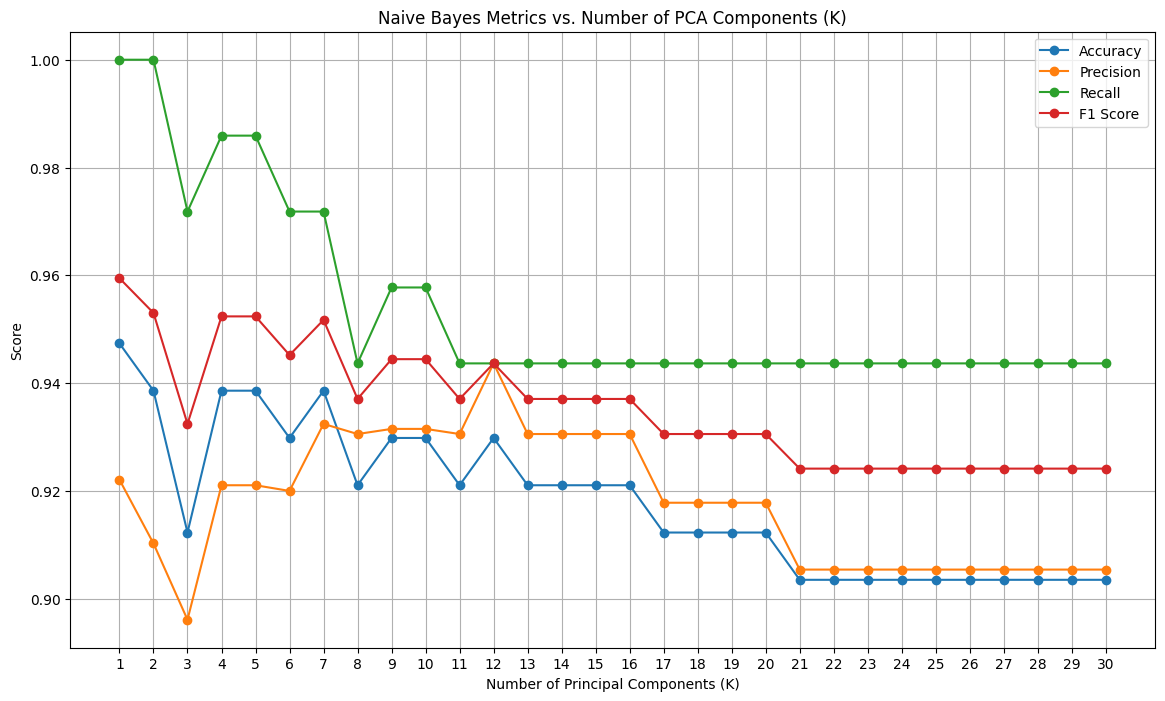

Optimal number of K components for Naive Bayes: 1
Best Metrics with K=1:
Accuracy: 0.9474, Precision: 0.9221, Recall: 1.0000, F1 Score: 0.9595


In [60]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Load the breast cancer dataset
cancer_data = load_breast_cancer()
X, y = cancer_data.data, cancer_data.target

# Train-eval split
X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

# Number of components to test
K_values = range(1, 31)  # Testing PCA components from 1 to 30

for K in K_values:
    # PCA
    pca = PCA(n_components=K)
    X_train_pca = pca.fit_transform(X_train)
    X_eval_pca = pca.transform(X_eval)

    # Naive Bayes Classifier
    model = GaussianNB()
    model.fit(X_train_pca, y_train)

    # Predictions
    y_eval_pred = model.predict(X_eval_pca)

    cm = confusion_matrix(y_eval, y_eval_pred)
    accuracy = np.mean(y_eval_pred == y_eval)
    precision = cm[1, 1] / (cm[1, 1] + cm[0, 1]) if (cm[1, 1] + cm[0, 1]) > 0 else 0
    recall = cm[1, 1] / (cm[1, 1] + cm[1, 0]) if (cm[1, 1] + cm[1, 0]) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    # Store metrics
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1_score)

# Plot results
plt.figure(figsize=(14, 8))
plt.plot(K_values, accuracy_list, label='Accuracy', marker='o')
plt.plot(K_values, precision_list, label='Precision', marker='o')
plt.plot(K_values, recall_list, label='Recall', marker='o')
plt.plot(K_values, f1_score_list, label='F1 Score', marker='o')
plt.title('Naive Bayes Metrics vs. Number of PCA Components (K)')
plt.xlabel('Number of Principal Components (K)')
plt.ylabel('Score')
plt.xticks(K_values)
plt.legend()
plt.grid()
plt.show()

# Identify the optimum K
optimal_k = np.argmax(accuracy_list) + 1  # Adding 1 for 0-indexing
print(f'Optimal number of K components for Naive Bayes: {optimal_k}')

# Report the best metrics
best_accuracy = accuracy_list[optimal_k - 1]
best_precision = precision_list[optimal_k - 1]
best_recall = recall_list[optimal_k - 1]
best_f1_score = f1_score_list[optimal_k - 1]

print(f'Best Metrics with K={optimal_k}:')
print(f'Accuracy: {best_accuracy:.4f}, Precision: {best_precision:.4f}, Recall: {best_recall:.4f}, F1 Score: {best_f1_score:.4f}')